# 2020 SUMMER ESC :: Week 5 세션 과제

2020.08.23 김채형

## 과제 1

모두의딥러닝 시즌2 강의의 longsequence 코드 lstm 모델 적용해보기.

In [1]:
import torch
import torch.optim as optim
import numpy as np
import torch.nn as nn

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")
print(sentence)

if you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.


In [4]:
# make dictionary
char_set = list(set(sentence)) # 중복 없는 character level 리스트 생성
print(char_set)
char_dic = {c: i for i, c in enumerate(char_set)} # key=character, value=index 인 딕셔너리 생성
print(char_dic)

["'", 'r', 'o', 'w', 'y', 'k', 'f', ' ', 't', 'e', 'u', 'c', 'd', 'a', 'b', 'h', 's', 'i', 'm', 'g', '.', 'l', ',', 'p', 'n']
{"'": 0, 'r': 1, 'o': 2, 'w': 3, 'y': 4, 'k': 5, 'f': 6, ' ': 7, 't': 8, 'e': 9, 'u': 10, 'c': 11, 'd': 12, 'a': 13, 'b': 14, 'h': 15, 's': 16, 'i': 17, 'm': 18, 'g': 19, '.': 20, 'l': 21, ',': 22, 'p': 23, 'n': 24}


In [5]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10  # Any arbitrary number (window)
learning_rate = 0.1

In [6]:
# data setting
x_data = []
y_data = []

for i in range(0, len(sentence)-sequence_length):
    x_str = sentence[i:i+sequence_length]
    y_str = sentence[i+1:i+1+sequence_length]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

x_one_hot = [np.eye(dic_size)[x] for x in x_data]

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [7]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [8]:
# declare model
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.lstm = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.lstm(x)
        x = self.fc(x)
        return x

In [9]:
net = Net(dic_size, hidden_size, 2)

In [10]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [11]:
# start training
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        #print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]

    print('[epoch %d]' % (i+1), predict_str, '\n')

[epoch 1] rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr 

[epoch 2]                                                                                                                                                                                     

[epoch 3] nnirnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn 

[epoch 4] eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee 

[epoch 5] eeoeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeoeeeeeee 

[epoch 6]       t                       

[epoch 46] l you want to build a ship, don't drum up people together te collect wood and don't dssign them tasks and work, but rather teach them to long for the endless immensity of the seam 

[epoch 47] l you want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them to long for the endless immensity of the seac 

[epoch 48] l you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the seam 

[epoch 49] l you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the seam 

[epoch 50] l you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the seam 

[epoch 51] l you want to build a sh

[epoch 94] g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 

[epoch 95] g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 

[epoch 96] p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 

[epoch 97] g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 

[epoch 98] g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea. 

[epoch 99] g you want to build a sh

## 과제 2

<https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html>  
위 링크 따라해보기!

### 데이터 불러오기

In [12]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

In [13]:
import string
import unicodedata

In [14]:
all_letters = string.ascii_letters + " .,;'" # ASCII 기준 모든 문자
print(all_letters)
n_letters = len(all_letters) # 모든 문자 개수
print(n_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
57


In [15]:
# 유니코드 문자열을 ASCII로 변환하는 함수
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) # 유니코드 문자열인 s에 대하여 정규화 형식 NFD를 적용하여 반환
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [16]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [17]:
# 해당 경로에 있는 파일을 읽어오는 함수
def findFiles(path): 
    return glob.glob(path) 

In [18]:
# 확인
print(findFiles('data/names/*.txt')) # data/names/ 경로에 있는 txt파일명을 모두 읽어옴!

['data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Japanese.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Polish.txt']


In [19]:
def readLines(filename):
    """
    open(filename, encoding='utf-8').read() => 파일 읽기
    open(filename, encoding='utf-8').read().strip() => 양 옆 공백 제거
    open(filename, encoding='utf-8').read().strip().split('\n') => 줄바꿈을 기준으로 문자열 분리하여 리스트 반환
    unicodeToAscii(line) for line in lines => 모든 리스트 원소에 대하여 유니코드 문자열을 ASCII로 변환
    """
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines] # 리스트 반환

In [20]:
category_lines = {} # category=언어, lines=이름으로 구성된 리스트 가 매핑될 딕셔너리
all_categories = [] # 모든 category(언어)를 담을 리스트

for filename in findFiles('data/names/*.txt'): # 모든 파일에 대하여 반복
    """
    os.path.basename(filename) => Czech.txt
    os.path.splitext(os.path.basename(filename)) => ('Czech', '.txt')
    os.path.splitext(os.path.basename(filename))[0] => Czech => category
    """
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename) 
    category_lines[category] = lines

In [21]:
# 확인
print(category_lines['Czech'])

['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch', 'Antonowitz', 'Bacon', 'Ballalatak', 'Ballaltick', 'Bartonova', 'Bastl', 'Baroch', 'Benesch', 'Betlach', 'Biganska', 'Bilek', 'Blahut', 'Blazek', 'Blazek', 'Blazejovsky', 'Blecha', 'Bleskan', 'Blober', 'Bock', 'Bohac', 'Bohunovsky', 'Bolcar', 'Borovka', 'Borovski', 'Borowski', 'Borovsky', 'Brabbery', 'Brezovjak', 'Brousil', 'Bruckner', 'Buchta', 'Cablikova', 'Camfrlova', 'Cap', 'Cerda', 'Cermak', 'Chermak', 'Cermak', 'Cernochova', 'Cernohous', 'Cerny', 'Cerney', 'Cerny', 'Cerv', 'Cervenka', 'Chalupka', 'Charlott', 'Chemlik', 'Chicken', 'Chilar', 'Chromy', 'Cihak', 'Clineburg', 'Klineberg', 'Cober', 'Colling', 'Cvacek', 'Czabal', 'Damell', 'Demall', 'Dehmel', 'Dana', 'Dejmal', 'Dempko', 'Demko', 'Dinko', 'Divoky', 'Dolejsi', 'Dolezal', 'Doljs', 'Dopita', 'Drassal', 'Driml', 'Duyava', 'Dvorak', 'Dziadik', 'Egr', 'Entler', 'Faltysek', 'Faltejsek', 'Fencl', 'Fenyo', 'Fillipova', 'Finfera', 'Finferovy', 'Finke', 'Fojtikova', 'Fremut', 'Fried

In [22]:
# target class 개수 설정
n_categories = len(all_categories)

### 데이터 전처리

이름을 Tensor로 변경

In [23]:
import torch

In [24]:
# 문자에 대하여 인덱스를 반환하는 함수
def letterToIndex(letter):
    return all_letters.find(letter) # letter의 인덱스 반환

In [25]:
# 문자에 대하여 one-hot encoding 하는 함수
# tensor : <1 x 전체 문자 개수>
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters) # 모두 0을 값으로 갖는 tensor 생성
    tensor[0][letterToIndex(letter)] = 1 # letter의 인덱스에 1을 할당
    return tensor # one-hot vector 반환

In [26]:
print(letterToTensor('J'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [27]:
# 문자열(이름)에 대하여 one-hot encoding 하는 함수
# tensor : <문자열(이름)의 문자 개수 x 1 x 전체 문자 개수>
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [28]:
print(lineToTensor('Jones'))

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [29]:
print(lineToTensor('Jones').size())

torch.Size([5, 1, 57])


### 모델링

In [30]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [31]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [32]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)

tensor([[-2.9077, -2.8067, -2.9400, -2.8250, -2.9669, -2.8933, -2.8971, -2.8561,
         -2.9290, -2.8793, -2.9426, -2.8676, -2.9117, -2.8428, -2.9483, -2.9142,
         -2.8049, -2.9139]], grad_fn=<LogSoftmaxBackward>)


In [33]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output) # tensor :  <1 x n_categories>

tensor([[-2.9077, -2.8067, -2.9400, -2.8250, -2.9669, -2.8933, -2.8971, -2.8561,
         -2.9290, -2.8793, -2.9426, -2.8676, -2.9117, -2.8428, -2.9483, -2.9142,
         -2.8049, -2.9139]], grad_fn=<LogSoftmaxBackward>)


### 학습

In [34]:
# category(언어), line(이름) 가져오는 함수
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

In [35]:
# 확인
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Dutch / line = Bueren
category = Greek / line = Papadelias
category = Chinese / line = Kwong
category = Korean / line = Youn
category = Chinese / line = Kang
category = Chinese / line = Zhao
category = Polish / line = Mozdzierz
category = Spanish / line = Tomas
category = Vietnamese / line = Doan
category = Polish / line = Zdunowski


In [36]:
# 해당 category(언어) 와 인덱스 반환하는 함수
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) # output에서 가장 큰 값 => top_n, 가장 큰 값의 인덱스 => top_i
    category_i = top_i[0].item() # top_i 즉 인덱스의 자료형을 텐서에서 정수로 변환 
    return all_categories[category_i], category_i # 해당 category(언어)와 인덱스 반환

In [37]:
# 확인
print(categoryFromOutput(output))

('Korean', 16)


In [38]:
# training 함수
def train(category_tensor, line_tensor):
    
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [39]:
# 소요 시간 추적하는 함수
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [40]:
# loss 설정
criterion = nn.NLLLoss()

In [41]:
# training

learning_rate = 0.005

n_iters = 100000 # iteration 횟수 설정
print_every = 5000 # 화면에 출력할 단위
plot_every = 1000 # 그래프에 출력할 단위

# 그래프를 그리기 위한 loss 추적
all_losses = [] # 모든 loss를 담을 리스트 생성
current_loss = 0 # 현재 loss 초기화

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample() # 데이터 가져오기
    output, loss = train(category_tensor, line_tensor) # training
    current_loss += loss # loss 업데이트

    # iteration 횟수, 퍼센트, 시간, loss, 이름, 예측값, 실제값 출력
    if iter % print_every == 0: 
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter/n_iters*100, timeSince(start), loss, line, guess, correct))

    # 현재 loss를 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 11s) 1.8221 Porohovschikov / Greek ✗ (Russian)
10000 10% (0m 22s) 1.1656 Mar / Chinese ✓
15000 15% (0m 32s) 2.3465 Clegg / Dutch ✗ (English)
20000 20% (0m 44s) 2.4208 Kuntz / Spanish ✗ (German)
25000 25% (0m 55s) 2.0529 Nigro / Portuguese ✗ (Italian)
30000 30% (1m 8s) 2.8465 Summers / Dutch ✗ (English)
35000 35% (1m 20s) 0.9179 An / Vietnamese ✓
40000 40% (1m 32s) 0.6931 Si / Korean ✓
45000 45% (1m 42s) 3.4038 Adam / Arabic ✗ (French)
50000 50% (1m 52s) 0.0756 Brisimitzakis / Greek ✓
55000 55% (2m 2s) 1.5499 Jegulin / Russian ✓
60000 60% (2m 13s) 1.0473 Torres / Portuguese ✓
65000 65% (2m 25s) 0.7496 Mo / Korean ✓
70000 70% (2m 36s) 1.4060 Balawin / French ✗ (Russian)
75000 75% (2m 48s) 0.7343 Dunajski / Polish ✓
80000 80% (3m 0s) 0.0020 Paraskevopoulos / Greek ✓
85000 85% (3m 10s) 2.1255 Kenzel / Polish ✗ (Czech)
90000 90% (3m 21s) 0.0674 Takasu / Japanese ✓
95000 95% (3m 30s) 0.6871 Ryu / Korean ✓
100000 100% (3m 39s) 0.8780 Kim / Korean ✓


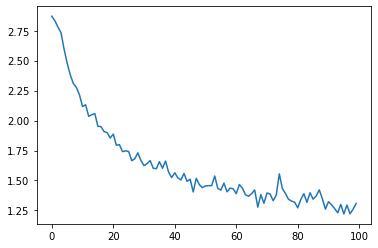

In [42]:
# loss 그래프
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

### 모델 평가

In [43]:
# 해당 line(이름)에서 output 반환하는 함수
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    return output

In [44]:
# 정확하게 예측한 것 추적
confusion = torch.zeros(n_categories, n_categories) # 0으로 초기화

n_confusion = 10000
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample() # 데이터 가져오기
    output = evaluate(line_tensor) # 예측값 가져오기
    guess, guess_i = categoryFromOutput(output) # 예측값 (category와 인덱스) 가져오기
    category_i = all_categories.index(category) # 실제값 가져오기
    confusion[category_i][guess_i] += 1 # 업데이트

for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum() # 모든 행을 합계로 나누어 정규화

In [45]:
# 확인
print(confusion)

tensor([[0.3706, 0.0524, 0.0297, 0.0664, 0.0140, 0.0210, 0.0192, 0.0507, 0.0105,
         0.0542, 0.0315, 0.0157, 0.0175, 0.0297, 0.0192, 0.0367, 0.0140, 0.1469],
        [0.0685, 0.3405, 0.0396, 0.0234, 0.0198, 0.0198, 0.0018, 0.0559, 0.0126,
         0.0883, 0.0306, 0.0072, 0.0072, 0.0144, 0.0757, 0.1297, 0.0252, 0.0396],
        [0.0224, 0.0224, 0.7071, 0.0616, 0.0354, 0.0243, 0.0000, 0.0019, 0.0000,
         0.0075, 0.0019, 0.0037, 0.0149, 0.0131, 0.0112, 0.0131, 0.0280, 0.0317],
        [0.0018, 0.0000, 0.0395, 0.7540, 0.0090, 0.0054, 0.0072, 0.0036, 0.0036,
         0.0036, 0.0126, 0.0018, 0.0431, 0.0180, 0.0072, 0.0090, 0.0162, 0.0646],
        [0.0000, 0.0000, 0.0000, 0.0071, 0.6943, 0.1272, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0035, 0.0018, 0.0106, 0.1537, 0.0018],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1356, 0.8029, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0615, 0.0000],
        [0.0380, 0.007

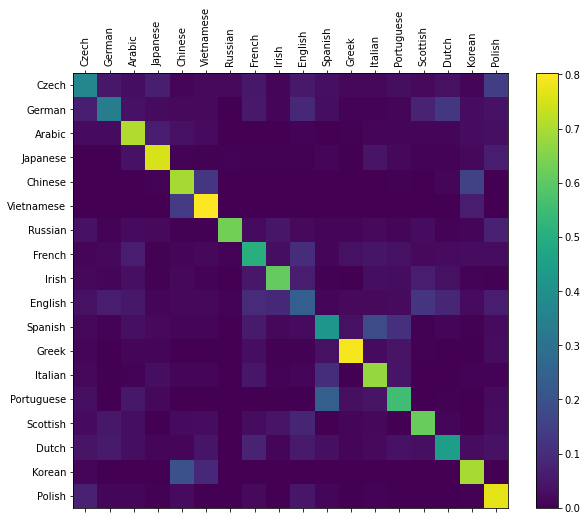

In [46]:
# 그래프 설정
fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# 그래프 출력
plt.show()

In [47]:
# 사용자 입력으로 prediction 하는 함수
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line) # '\n' : 줄바꿈, %s : input_line 삽입
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

In [48]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.05) Russian
(-1.08) Czech
(-1.41) Polish

> Jackson
(-0.73) Scottish
(-1.39) English
(-2.14) Russian

> Satoshi
(-0.99) Polish
(-1.97) Portuguese
(-2.15) Italian
